In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import datetime
import pandas as pd
import sys

sys.path.append("..")
from temporal_graph import TemporalGraph, limpiar_data

In [3]:
tiempos = [(2018, 12, 21, 9, 0, 0, 450464),
           (2018, 12, 21, 10, 0, 0, 450464),
           (2018, 12, 21, 12, 0, 0, 450464),
           (2018, 12, 21, 14, 0, 0, 450464),
           (2018, 12, 21, 18, 0, 0, 450464),
           (2018, 12, 21, 23, 0, 0, 450464),
           (2018, 12, 22, 5, 0, 0, 450464)]
tiempos = [ datetime.datetime(A, mes, dia, hora, minu, segu, ms) for (A, mes, dia, hora, minu, segu, ms) in tiempos]
tiempos

[datetime.datetime(2018, 12, 21, 9, 0, 0, 450464),
 datetime.datetime(2018, 12, 21, 10, 0, 0, 450464),
 datetime.datetime(2018, 12, 21, 12, 0, 0, 450464),
 datetime.datetime(2018, 12, 21, 14, 0, 0, 450464),
 datetime.datetime(2018, 12, 21, 18, 0, 0, 450464),
 datetime.datetime(2018, 12, 21, 23, 0, 0, 450464),
 datetime.datetime(2018, 12, 22, 5, 0, 0, 450464)]

In [4]:
# test: especificar los tiempos con los que trabaja el grafo
try:
    TemporalGraph([])
except Exception as e:
    print('Error:', e)

Error: Debe especificar los tiempos con los que trabaja el grafo


In [5]:
print(type(tiempos[0]))

<class 'datetime.datetime'>


In [6]:
TemporalGraph(tiempos)

### Data de prueba (paper Kostakos)

### Generar los enlaces:

In [7]:
data = pd.DataFrame({
    'sender': ['A', 'A', 'E', 'B', 'B', 'D', 'A'],
    'recipient': ['B', 'C, E', 'D', 'C', 'D', 'B', 'D'],
    'time': tiempos
})
data

,sender,recipient,time
0,A,B,2018-12-21 09:00:00.450464
1,A,"C, E",2018-12-21 10:00:00.450464
2,E,D,2018-12-21 12:00:00.450464
3,B,C,2018-12-21 14:00:00.450464
4,B,D,2018-12-21 18:00:00.450464
5,D,B,2018-12-21 23:00:00.450464
6,A,D,2018-12-22 05:00:00.450464


In [8]:
data.dtypes

sender               object
recipient            object
time         datetime64[ns]
dtype: object

In [9]:
str(type(data.time[0]))

"<class 'pandas._libs.tslibs.timestamps.Timestamp'>"

Indicarle al grafo que contruya los enlaces con este dataframe:

In [10]:
grafo_temporal = TemporalGraph(data.time)

In [11]:
grafo_temporal.build_links_from_data(data=data)

Enlace:  A B 2018-12-21 09:00:00.450464 A1
Enlace:  A C 2018-12-21 10:00:00.450464 A2
Enlace:  A E 2018-12-21 10:00:00.450464 A2
Enlace:  E D 2018-12-21 12:00:00.450464 E3
Enlace:  B C 2018-12-21 14:00:00.450464 B4
Enlace:  B D 2018-12-21 18:00:00.450464 B5
Enlace:  D B 2018-12-21 23:00:00.450464 D6
Enlace:  A D 2018-12-22 05:00:00.450464 A7


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


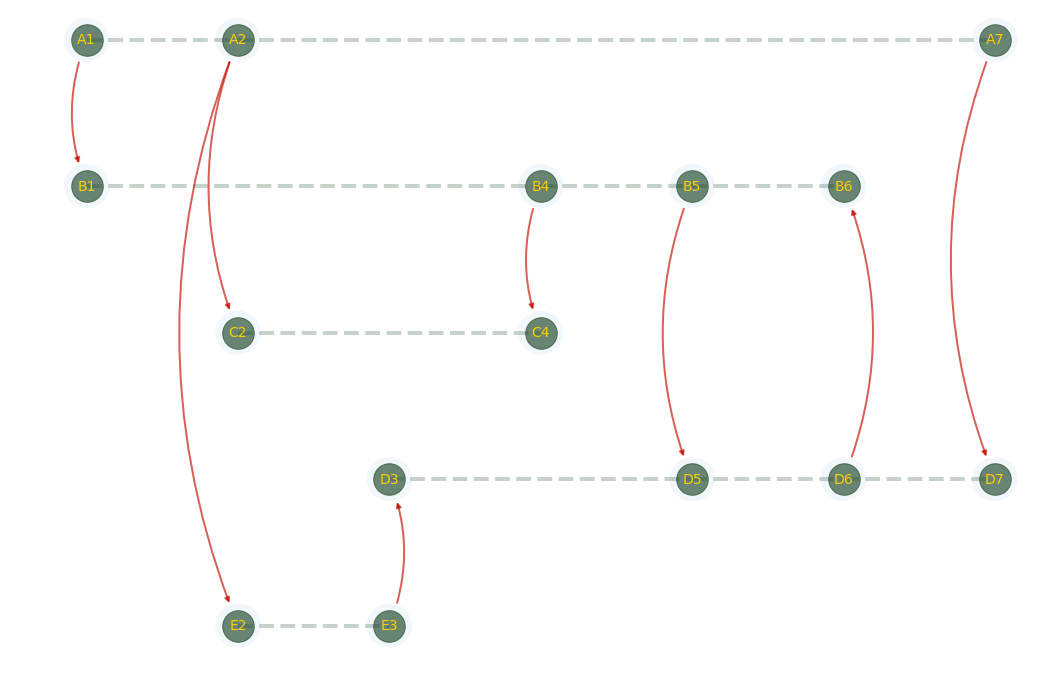

In [12]:
grafo_temporal.plot()

### Comprobar que los enlaces se crean cuando el dataframe tiene las columnas adecuadas:

In [13]:
set(data.columns.values)

{'recipient', 'sender', 'time'}

In [14]:
TemporalGraph(data.time)

In [15]:
data.rename(columns={'sender': 'emisor'}, inplace=True)
data.columns.values

array(['emisor', 'recipient', 'time'], dtype=object)

Probamos enviando un dataframe que no presenta las columnas esperadas:

In [16]:
g = TemporalGraph(data.time)
try:
    g.build_links_from_data(data=data)
except Exception as e:
    print(e)


            El dataframe especificado debe contener las columnas:
            sender, recipient, time


corregimos indicando que la columna que debe der interpretada como emisor es la de nombre 'emisor':

In [17]:
g.build_links_from_data(data=data, col_sender='emisor')

Enlace:  A B 2018-12-21 09:00:00.450464 A1
Enlace:  A C 2018-12-21 10:00:00.450464 A2
Enlace:  A E 2018-12-21 10:00:00.450464 A2
Enlace:  E D 2018-12-21 12:00:00.450464 E3
Enlace:  B C 2018-12-21 14:00:00.450464 B4
Enlace:  B D 2018-12-21 18:00:00.450464 B5
Enlace:  D B 2018-12-21 23:00:00.450464 D6
Enlace:  A D 2018-12-22 05:00:00.450464 A7


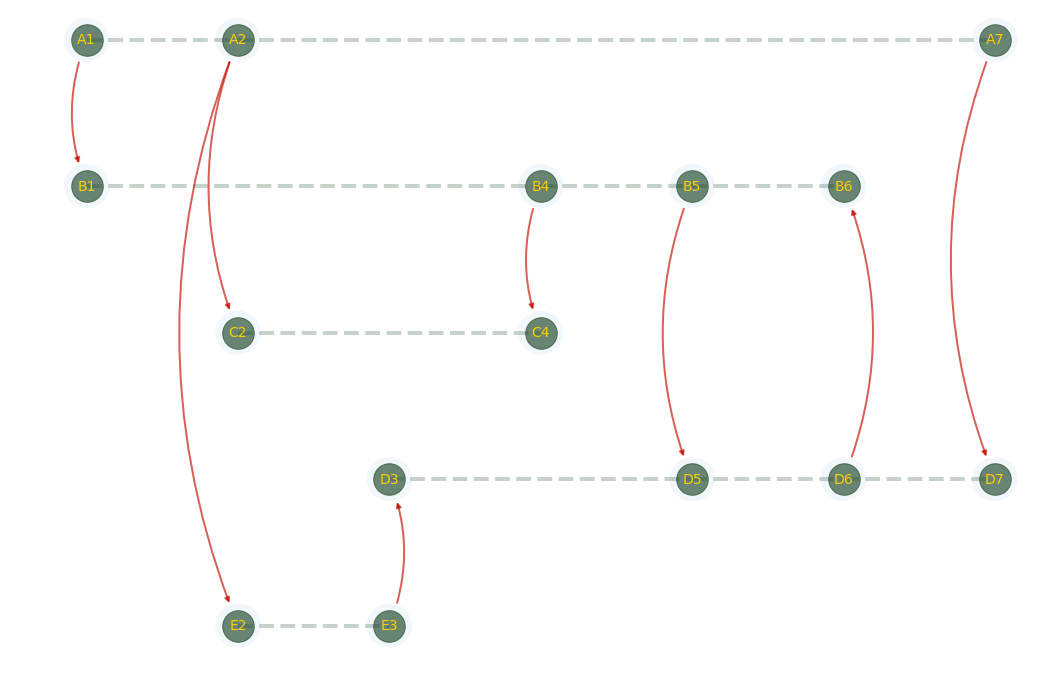

In [18]:
g.plot()

## Datos desde csv
Posiblemente una de las primeras fuentes de información que resulten útiles va a ser un archivo csv por lo cual incorporamos una forma de lidiar con esto de forma simple

In [19]:
mails_chain = pd.read_csv('../data/mails.csv', encoding='latin1')
mails_chain.head()

,origen,destino,fecha
0,Sofía,María,12/03/2018
1,Sofía,Lucía,12/03/2018
2,Sofía,Martina,1/04/2018
3,Sofía,Catalina,1/04/2018
4,Catalina,Elena,1/04/2018


In [20]:
reemplazos, mailschain = limpiar_data(mails_chain, 'origen', 'destino', 'fecha')
mailschain.head()

,sender,recipient,time
0,a,c,2018-03-12
1,a,d,2018-03-12
2,a,e,2018-04-01
3,a,b,2018-04-01
4,b,f,2018-04-01


In [21]:
reemplazos

{'Sofía': 'a',
 'Catalina': 'b',
 'María': 'c',
 'Lucía': 'd',
 'Martina': 'e',
 'Elena': 'f',
 'Emilia': 'g',
 'Valentina': 'h',
 'Paula': 'i',
 'Pablo': 'j',
 'Matías': 'k',
 'Pedro': 'l',
 'Tomás': 'm',
 'Benjamín': 'n',
 'Santiago': 'o',
 'Mateo': 'p',
 'Thiago': 'q',
 'Zoe': 'r',
 'Juan': 's',
 'Nicolás': 't',
 'Diego': 'u',
 'Fiorella': 'v',
 'Margarita': 'w',
 'Luciano': 'x',
 'Dana': 'y',
 'Imanol': 'z',
 'Denise': 'aa',
 'Santino': 'ab',
 'Josefina': 'ac'}

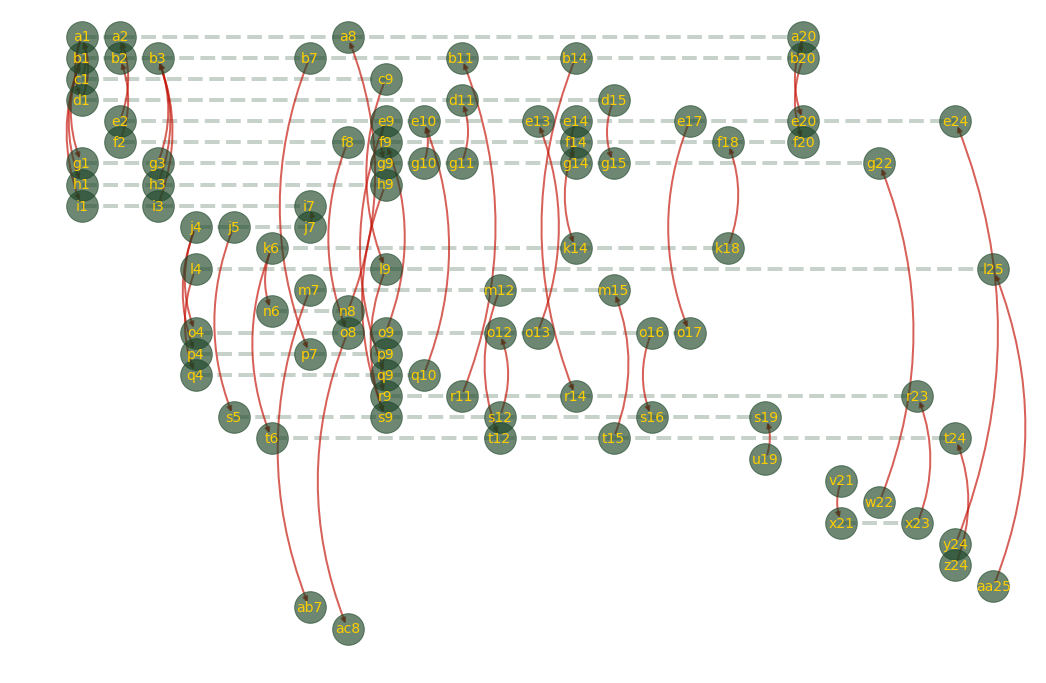

In [22]:
g = TemporalGraph(mailschain.time)
g.build_links_from_data(mailschain, verbose=False)
g.plot()

#### Testear paleta:

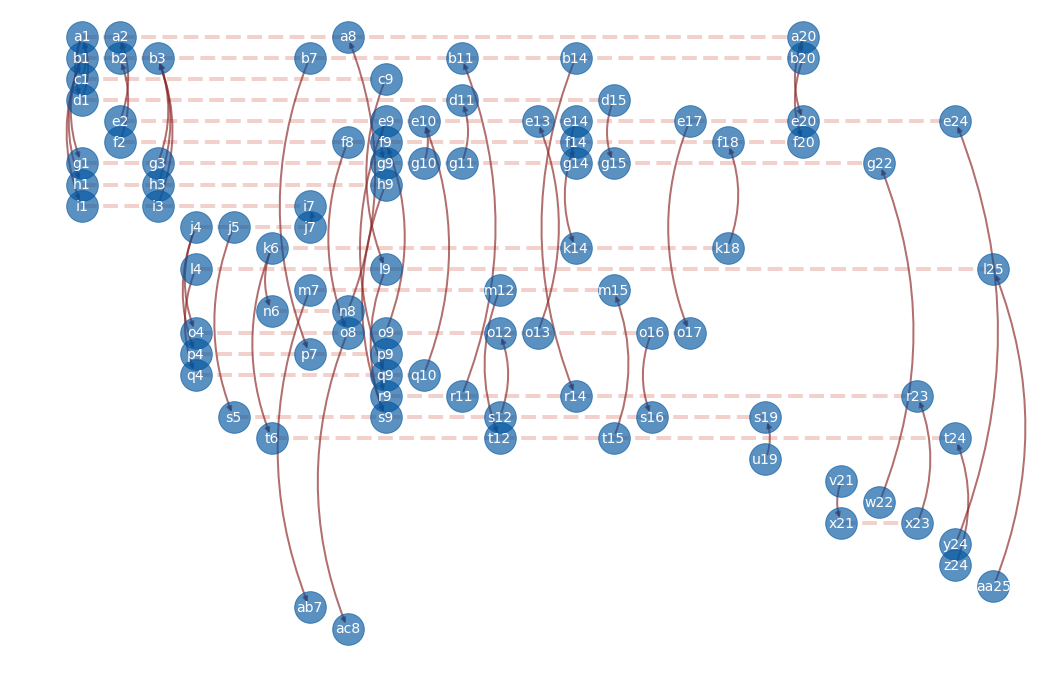

In [23]:
paleta = {
    'nodes_color': '#0457A0', #'#cc5522',
    'links_color': '#882222',
    'temp_links_color': '#cc4433',
    'label_color': 'white'
}
g.plot(paleta=paleta)

#### Testear generación de imágenes:

In [24]:
import os

In [25]:
os.listdir('output/')

['grafo-temporal.gif',
 'img_0.png',
 'img_1.png',
 'img_10.png',
 'img_11.png',
 'img_12.png',
 'img_13.png',
 'img_14.png',
 'img_15.png',
 'img_16.png',
 'img_17.png',
 'img_18.png',
 'img_19.png',
 'img_2.png',
 'img_20.png',
 'img_21.png',
 'img_22.png',
 'img_23.png',
 'img_24.png',
 'img_25.png',
 'img_26.png',
 'img_27.png',
 'img_28.png',
 'img_29.png',
 'img_3.png',
 'img_30.png',
 'img_31.png',
 'img_32.png',
 'img_33.png',
 'img_34.png',
 'img_35.png',
 'img_36.png',
 'img_37.png',
 'img_38.png',
 'img_39.png',
 'img_4.png',
 'img_40.png',
 'img_41.png',
 'img_42.png',
 'img_43.png',
 'img_44.png',
 'img_45.png',
 'img_46.png',
 'img_47.png',
 'img_48.png',
 'img_49.png',
 'img_5.png',
 'img_50.png',
 'img_51.png',
 'img_52.png',
 'img_53.png',
 'img_54.png',
 'img_55.png',
 'img_56.png',
 'img_6.png',
 'img_7.png',
 'img_8.png',
 'img_9.png']

In [ ]:
g = TemporalGraph(mailschain.time)
g.build_links_from_data(mailschain, verbose=False, save_images=True)

In [ ]:
', '.join(os.listdir('output/'))

In [ ]:
from IPython.display import Image
Image(filename="output/grafo-temporal.gif")

## Trabajar con el grafo:

In [ ]:
g.get_graph()

continuar...